In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

## Assignment 1

In [2]:
class PCA_Numpy:
    def __init__(self, k):
        # k: số chiều muốn giữ lại sau khi giảm chiều
        self.k = k
        self.mean = None
        self.U = None

    def fit(self, X):
        #Tính vector trung bình
        self.mean = np.mean(X, axis=0)

        #Trừ mean để đưa dữ liệu về gốc tọa độ
        X0 = X - self.mean

        #Tính ma trận hiệp phương sai
        n = X0.shape[0]
        C = np.dot(X0.T, X0) / n

        #Tính trị riêng và vector riêng
        val, vec = np.linalg.eigh(C)

        #Sắp xếp theo trị riêng giảm dần
        idx = np.argsort(val)[::-1]
        vec = vec[:, idx]

        #Lấy k vector riêng đầu tiên
        self.U = vec[:, :self.k]

    def transform(self, X):
        X0 = X - self.mean
        return np.dot(X0, self.U)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


## Assignment 2

In [3]:
def load_train_data(path, img_size=(128, 128)):
    X = []
    y = []
    label = 0

    for folder in sorted(os.listdir(path)):
        folder_path = os.path.join(path, folder)

        if folder == "test":
            continue
        if not os.path.isdir(folder_path):
            continue

        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)

            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue

            img = cv2.resize(img, img_size)
            X.append(img.flatten())
            y.append(label)

        label += 1

    return np.array(X), np.array(y)

In [4]:
X_train, y_train = load_train_data("yalefaces/yalefaces")

pca = PCA_Numpy(k=20)
X_train_pca = pca.fit_transform(X_train)

print("Train:", X_train.shape)
print("Train PCA:", X_train_pca.shape)

Train: (150, 16384)
Train PCA: (150, 20)


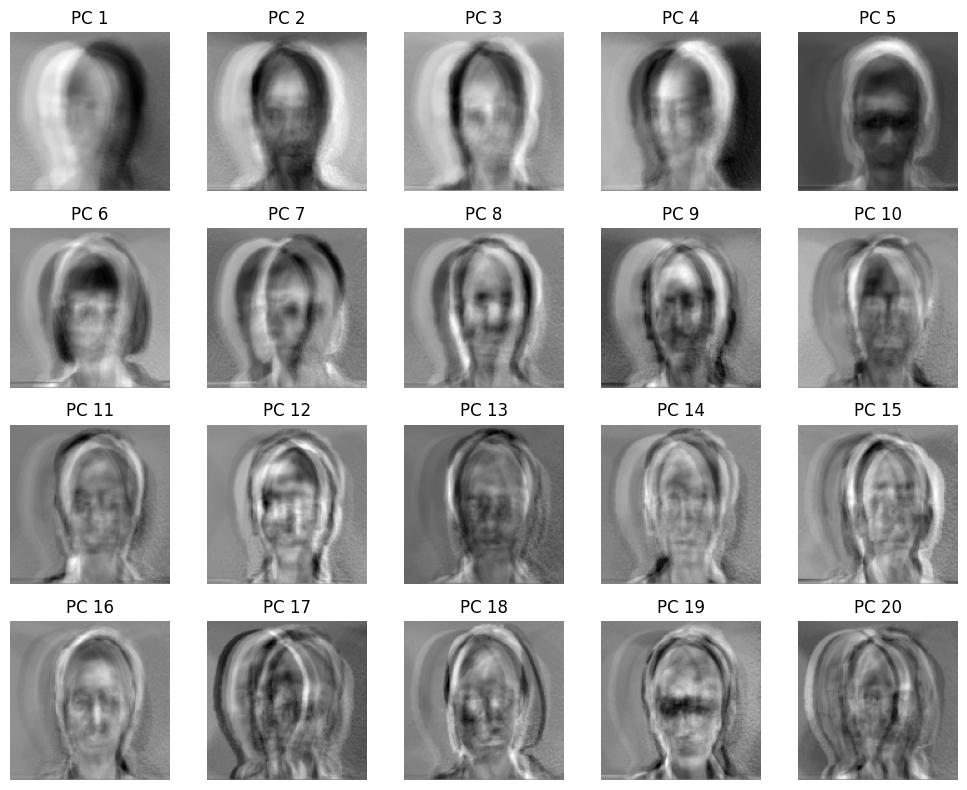

In [6]:
fig, axes = plt.subplots(4, 5, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
    eigenface = pca.U[:, i].reshape(128, 128)
    ax.imshow(eigenface, cmap="gray")
    ax.set_title(f"PC {i+1}")
    ax.axis("off")

plt.tight_layout()
plt.show()

## Assignment 3

In [45]:
def load_test_data(path, img_size=(128, 128)):
    X = []
    y = []

    files = os.listdir(path)

    for file_name in files:
        file_path = os.path.join(path, file_name)

        if os.path.isdir(file_path):
            continue

        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

        if img is None:
            try:
                import imageio.v2 as imageio
                img = imageio.imread(file_path)
                # Nếu ảnh đọc ra là ảnh màu, chuyển về xám
                if len(img.shape) > 2:
                    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            except ImportError:
                continue
            except Exception as e:
                continue

        if img is None:
            continue

        img = cv2.resize(img, img_size)
        X.append(img.flatten())

        label = file_name.split('.')[0]
        y.append(label)

    return np.array(X), np.array(y)

In [46]:
#Lấy danh sách tất cả các nhãn và sắp xếp theo bảng chữ cái
unique_labels = sorted(list(set(y_test)))

#Tạo từ điển ánh xạ: 'person-1' -> 0
label_mapping = {label: index for index, label in enumerate(unique_labels)}

#Chuyển y_test từ dạng chuỗi sang dạng số
y_test_numeric = np.array([label_mapping[label] for label in y_test])

accuracy = np.mean(y_pred == y_test_numeric)
print("Accuracy:", accuracy)

Accuracy: 0.8
